In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

# Informações sobre o dataset

Esse dataset foi construído a partir de informações em anúncios de venda de veículos disponíveis online, entre os dias 30/06/2022 e 04/07/2022. Na obtenção dos dados, foram procurados apenas anúncios profissionais de veículos com ano de fabricação a partir de 2000. Além disso, foi verificado no portal de vendas uma quantidade aproximadamente igual de anúncios entre as seguintes faixas de quilometragem: 0-30, 30-60, 60-100, 100+. Sendo assim, de forma a tornar a amostragem realizada mais representativa, os valores de quilometragem nesse dataset seguem uma proporção parecida.

In [37]:
df = pd.read_csv('cars_data_cleaned.csv')

df.head()

,Marca,Descricao,Tipo,Ano,UF,Km,Potencia,Combustivel,Cambio,Direcao,...,TravaEletrica,VidroEletrico,Som,SensorDeRe,CameraDeRe,Blindado,Preco,Modelo,Dias,KmLimite
0,ALFA ROMEO,ALFA ROMEO 156 TS/SPORT/ELEGANT 2.0 16V,NaN,2012,AM,1,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,50000.0,156,4021,1407350
1,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,NaN,Diesel,Automático,NaN,...,False,True,True,True,True,False,139800.0,COMPASS,2194,767900
2,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,True,True,True,False,False,False,49900.0,SAVEIRO,3290,1151500
3,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,True,True,True,True,False,False,47900.0,ETIOS,2925,1023750
4,VW - VOLKSWAGEN,VW - VOLKSWAGEN POLO COMFORT. 200 TSI 1.0 FLEX...,NaN,2021,PR,11139,1.0,Flex,Automático,Hidráulica,...,True,True,False,True,False,False,98900.0,POLO,733,256550


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5212 entries, 0 to 5211
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marca           5207 non-null   object 
 1   Descricao       5212 non-null   object 
 2   Tipo            4288 non-null   object 
 3   Ano             5212 non-null   int64  
 4   UF              5212 non-null   object 
 5   Km              5212 non-null   int64  
 6   Potencia        3964 non-null   object 
 7   Combustivel     5162 non-null   object 
 8   Cambio          5183 non-null   object 
 9   Direcao         4094 non-null   object 
 10  Cor             4327 non-null   object 
 11  FinalDePlaca    4433 non-null   float64
 12  Portas          5067 non-null   object 
 13  UnicoDono       2962 non-null   object 
 14  AceitaTrocas    3357 non-null   object 
 15  ArCondicionado  5212 non-null   bool   
 16  AirBag          5212 non-null   bool   
 17  Alarme          5212 non-null   b

# Dropando os valores irrealistas

Nessa etapa serão dropadas as observações que atendam ao menos um dos critérios abaixo:

- Sem informação da marca do veículo;
- Sem informação do modelo do veículo;
- Com valor de quilometragem maior que o definido pela feature `KmLimite`.

In [39]:
df = df.dropna(subset=['Marca', 'Modelo'])
df = df.drop(df.loc[df['Km']> df['KmLimite']].index)
df = df.reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5170 entries, 0 to 5169
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marca           5170 non-null   object 
 1   Descricao       5170 non-null   object 
 2   Tipo            4257 non-null   object 
 3   Ano             5170 non-null   int64  
 4   UF              5170 non-null   object 
 5   Km              5170 non-null   int64  
 6   Potencia        3939 non-null   object 
 7   Combustivel     5124 non-null   object 
 8   Cambio          5144 non-null   object 
 9   Direcao         4068 non-null   object 
 10  Cor             4301 non-null   object 
 11  FinalDePlaca    4403 non-null   float64
 12  Portas          5029 non-null   object 
 13  UnicoDono       2946 non-null   object 
 14  AceitaTrocas    3336 non-null   object 
 15  ArCondicionado  5170 non-null   bool   
 16  AirBag          5170 non-null   bool   
 17  Alarme          5170 non-null   b

# Tratando os valores faltantes

Seguindo os insights gerados pela análise exploratória de dados (EDA), os valores faltantes do dataset serão preenchidos:

- `Tipo`: conforme visto na EDA, existe uma relação entre o tipo de carro e sua marca e modelo. Sendo assim, na presença de valores faltantes de tipo de carro, será utilizada a moda da distribuição para a mesma marca e modelo de veículo;


- `Potencia`: assim como para o tipo de veículo, a potência tem uma relação direta com a marca e modelo do mesmo. Sendo assim, na presença de valores faltantes será utilizada a moda da distribuição para a mesma marca e modelo de veículo;


- `Combustível`: conforme visto na EDA, o tipo de carro influencia no tipo de combustível utilizado. Sendo assim, na presença de valores faltantes será utilizada a moda da distribuição para o mesmo tipo de veículo;


- `Cambio`: na presença de valores faltantes, será utilizada a moda da distribuição para a mesma marca e modelo de veículo;


- `Direcao`: na presença de valores faltantes, será utilizada a moda da distribuição para a mesma marca e modelo de veículo;


- `Cor`: de forma a preservar as proporções encontradas no dataset, os valores faltantes serão preenchidos a partir de um sorteio aleatório com probabilidades a priori iguais às proporções das cores nas observações preenchidas;


- `FinalDePlaca`: na presença de valores faltantes, será utilizado um sorteio aleatório com iguais probabilidades para qualquer um dos números, entre 0 e 9;


- `Portas`: na presença de valores faltantes, será utilizada a moda da distribuição para a mesma marca e modelo de veículo;


- `UnicoDono`: conforme visto na EDA, o ano do modelo influencia no fato desse ter tido um único dono. Sendo assim, será realizado um sorteio aleatório com probabilidades a priori iguais às proporções de "Sim" e "Não" nas observações preenchidas, considerando apenas aquelas referentes ao mesmo ano do modelo avaliado;


- `AceitaTrocas`: de forma a preservar as proporções encontradas no dataset, os valores faltantes serão preenchidos a partir de um sorteio aleatório com probabilidades a priori iguais às proporções de "Sim" e "Não" nas observações preenchidas.

## Features dependentes do modelo

É importante notar que algumas marcas possuem uma única observação em todo o dataset. Sendo assim, caso a mesma possua um valor faltante, a estratégia de preenchimento proposta acima é inviável. Por se tratarem de poucas observações, essas serão dropadas: 

In [40]:
modelos_unicos = df['Modelo'].value_counts()[df['Modelo'].value_counts()==1].index
marcas_unicas = df['Marca'].value_counts()[df['Marca'].value_counts()==1].index

df.loc[(df['Modelo'].isin(modelos_unicos))&(df['Marca'].isin(marcas_unicas))&(df.isna().any(axis=1))]

,Marca,Descricao,Tipo,Ano,UF,Km,Potencia,Combustivel,Cambio,Direcao,...,TravaEletrica,VidroEletrico,Som,SensorDeRe,CameraDeRe,Blindado,Preco,Modelo,Dias,KmLimite
0,ALFA ROMEO,ALFA ROMEO 156 TS/SPORT/ELEGANT 2.0 16V,NaN,2012,AM,1,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,50000.0,156,4021,1407350
220,ASIA MOTORS,ASIA MOTORS TOPIC LUXO DIESEL,NaN,2018,AM,1,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,50000.0,TOPIC,1829,640150
4969,SSANGYONG,SSANGYONG KYRON 2.0 16V 141CV TDI DIESEL AUT.,SUV,2010,MG,164000,2.0 - 2.9,Diesel,Automático,Hidráulica,...,True,True,True,False,True,False,48900.0,KYRON,4751,1662850


In [41]:
df = df.drop(df.loc[(df['Modelo'].isin(modelos_unicos))&(df['Marca'].isin(marcas_unicas))&(df.isna().any(axis=1))].index)
df = df.reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marca           5167 non-null   object 
 1   Descricao       5167 non-null   object 
 2   Tipo            4256 non-null   object 
 3   Ano             5167 non-null   int64  
 4   UF              5167 non-null   object 
 5   Km              5167 non-null   int64  
 6   Potencia        3938 non-null   object 
 7   Combustivel     5123 non-null   object 
 8   Cambio          5143 non-null   object 
 9   Direcao         4067 non-null   object 
 10  Cor             4300 non-null   object 
 11  FinalDePlaca    4403 non-null   float64
 12  Portas          5028 non-null   object 
 13  UnicoDono       2945 non-null   object 
 14  AceitaTrocas    3335 non-null   object 
 15  ArCondicionado  5167 non-null   bool   
 16  AirBag          5167 non-null   bool   
 17  Alarme          5167 non-null   b

In [42]:
var_obj = df.select_dtypes(['object']).columns

marcas_e_modelos = df.groupby(['Marca', 'Modelo'])[var_obj].agg(lambda x: pd.Series.mode(x)[0] if len(pd.Series.mode(x)) > 0 else None)
marcas_e_modelos

Descricao  \
Marca           Modelo                                                          
AUDI            A1                         AUDI A1 1.4 TFSI 122CV S-TRONIC 3P   
                A3              AUDI A3 SEDAN 1.4/ ATTRA. 16V TB FSI S-TRONIC   
                A4                                                    AUDI A4   
                A5                AUDI A5 SPORTBACK 2.0 16V TFSI 211CV MULTI.   
                A6                    AUDI A6 3.0 TFSI V6 QUATTRO S TRONIC 4P   
...                                                                       ...   
VW - VOLKSWAGEN TOUAREG     VW - VOLKSWAGEN TOUAREG 3.6 24V V6 280CV TIPTR...   
                UP!                                       VW - VOLKSWAGEN UP!   
                VIRTUS      VW - VOLKSWAGEN VIRTUS COMFORT. 200 TSI 1.0 FL...   
                VOLKSWAGEN  VW - VOLKSWAGEN VOLKSWAGEN UP MPI 1.0 12V FLEX...   
                VOYAGE              VW - VOLKSWAGEN VOYAGE 1.6 MSI FLEX 8V 4P   

                               Tipo  UF   Potencia Combustivel      Cambio  \
Marca           Modelo                                                       
AUDI            A1            Hatch  SP        1.4    Gasolina  Automático   
                A3             Sedã  SP        1.4    Gasolina  Automático   
                A4          Passeio  PR  2.0 - 2.9    Gasolina  Automático   
                A5             Sedã  GO  2.0 - 2.9    Gasolina  Automático   
                A6             Sedã  RJ  3.0 - 3.9    Gasolina  Automático   
...                             ...  ..        ...         ...         ...   
VW - VOLKSWAGEN TOUAREG         SUV  MG  3.0 - 3.9    Gasolina  Automático   
                UP!           Hatch  RJ        1.0        Flex      Manual   
                VIRTUS         Sedã  SP        1.0        Flex  Automático   
                VOLKSWAGEN    Hatch  RJ        1.0        Flex      Manual   
                VOYAGE         Sedã  MG        1.6        Flex      Manual   

                               Direcao     Cor    Portas UnicoDono  \
Marca           Modelo                                               
AUDI            A1            Elétrica   Prata  4 portas       Não   
                A3          Hidráulica   Preto  4 portas       Não   
                A4          Hidráulica   Cinza  4 portas      None   
                A5          Hidráulica    Azul  4 portas       Sim   
                A6            Elétrica   Preto  4 portas       Não   
...                                ...     ...       ...       ...   
VW - VOLKSWAGEN TOUAREG     Hidráulica   Prata  4 portas       Não   
                UP!         Hidráulica  Branco  4 portas       Não   
                VIRTUS      Hidráulica   Prata  4 portas       Sim   
                VOLKSWAGEN    Elétrica  Branco  4 portas       Sim   
                VOYAGE      Hidráulica   Prata  4 portas       Sim   

                           AceitaTrocas  
Marca           Modelo                   
AUDI            A1                  Sim  
                A3                  Sim  
                A4                 None  
                A5                  Sim  
                A6                  Sim  
...                                 ...  
VW - VOLKSWAGEN TOUAREG             Sim  
                UP!                 Sim  
                VIRTUS              Sim  
                VOLKSWAGEN          Sim  
                VOYAGE              Sim  

[315 rows x 11 columns]

In [43]:
def correcao(x):
    var_corr = ['Tipo', 'Potencia', 'Cambio', 'Direcao', 'Portas']
    for var in var_corr:
        if pd.isna(x[var]):
            if not pd.isna(marcas_e_modelos.loc[x.Marca, x.Modelo][var]):
                x[var] = marcas_e_modelos.loc[x.Marca, x.Modelo][var]
            elif pd.isna(marcas_e_modelos.loc[x.Marca][var]).sum() < pd.isna(marcas_e_modelos.loc[x.Marca][var]).count():
                x[var] = marcas_e_modelos.loc[x.Marca][var].mode()[0]
            else:
                x[var] = df[var].mode()[0]
                
    return x

In [44]:
df = df.apply(lambda x: correcao(x), axis=1)

## Combustivel

In [45]:
combustiveis = df.groupby('Tipo')['Combustivel'].agg(lambda x: pd.Series.mode(x)[0] if len(pd.Series.mode(x)) > 0 else None)

combustiveis

Tipo
Buggy                 Flex
Caminhão Leve       Diesel
Conversível       Gasolina
Hatch                 Flex
Passeio               Flex
Pick-up             Diesel
SUV                   Flex
Sedã                  Flex
Van/Utilitário        Flex
Name: Combustivel, dtype: object

In [46]:
df['Combustivel'] = df.apply(lambda x: combustiveis[x.Tipo] if pd.isna(x.Combustivel) else x.Combustivel, axis=1)

## Cor

In [47]:
cores = df['Cor'].value_counts(normalize=True)

cores

Branco      0.329767
Prata       0.243721
Preto       0.192093
Cinza       0.117209
Vermelho    0.060930
Outra       0.021860
Azul        0.020465
Verde       0.006977
Amarelo     0.003488
Laranja     0.003488
Name: Cor, dtype: float64

In [48]:
df['Cor'] = df['Cor'].apply(lambda x: np.random.choice(cores.index, p=cores.values) if pd.isna(x) else x)

## FinalDePlaca

In [49]:
df['FinalDePlaca'] = df['FinalDePlaca'].apply(lambda x: np.random.choice(np.arange(0, 10)) if pd.isna(x) else x)
df['FinalDePlaca'] = df['FinalDePlaca'].astype('int64')

## UnicoDono

In [50]:
unico_dono = df.groupby('Ano')['UnicoDono'].value_counts(normalize=True)

unico_dono

Ano   UnicoDono
2000  Não          1.000000
2001  Não          0.833333
      Sim          0.166667
2002  Não          1.000000
2003  Não          1.000000
2004  Não          0.900000
      Sim          0.100000
2005  Não          0.916667
      Sim          0.083333
2006  Não          0.923077
      Sim          0.076923
2007  Não          0.961538
      Sim          0.038462
2008  Não          0.913043
      Sim          0.086957
2009  Não          0.923077
      Sim          0.076923
2010  Não          0.792208
      Sim          0.207792
2011  Não          0.846154
      Sim          0.153846
2012  Não          0.829412
      Sim          0.170588
2013  Não          0.767196
      Sim          0.232804
2014  Não          0.676190
      Sim          0.323810
2015  Não          0.677419
      Sim          0.322581
2016  Não          0.568966
      Sim          0.431034
2017  Não          0.523560
      Sim          0.476440
2018  Sim          0.507299
      Não          0.492701
2019

In [51]:
df['UnicoDono'] = df.apply(lambda x: np.random.choice(unico_dono.loc[x.Ano].index, 
                                                      p=unico_dono.loc[x.Ano].values) if pd.isna(x.UnicoDono) else x.UnicoDono,
                           axis=1)

## AceitaTrocas

In [52]:
trocas = df['AceitaTrocas'].value_counts(normalize=True)

trocas

Sim    0.951724
Não    0.048276
Name: AceitaTrocas, dtype: float64

In [53]:
df['AceitaTrocas'] = df['AceitaTrocas'].apply(lambda x: np.random.choice(trocas.index, p=trocas.values) if pd.isna(x) else x)

Abaixo pode ser observado que o dataset não possui mais valores faltantes:

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marca           5167 non-null   object 
 1   Descricao       5167 non-null   object 
 2   Tipo            5167 non-null   object 
 3   Ano             5167 non-null   int64  
 4   UF              5167 non-null   object 
 5   Km              5167 non-null   int64  
 6   Potencia        5167 non-null   object 
 7   Combustivel     5167 non-null   object 
 8   Cambio          5167 non-null   object 
 9   Direcao         5167 non-null   object 
 10  Cor             5167 non-null   object 
 11  FinalDePlaca    5167 non-null   int64  
 12  Portas          5167 non-null   object 
 13  UnicoDono       5167 non-null   object 
 14  AceitaTrocas    5167 non-null   object 
 15  ArCondicionado  5167 non-null   bool   
 16  AirBag          5167 non-null   bool   
 17  Alarme          5167 non-null   b

# Feature engineering

Na etapa de feature engineering, as seguintes variáveis serão criadas:

- `KmPorDias`: número de quilômetros diários percorrido pelo carro;
- `NumOpcionais`: número total de itens opcionais no veículo;
- `KmSqrt`: raiz quadrada da quilometragem do carro;
- `PotenciaNum`: versão quantitativa da potência do veículo. Foi considerada a mediana para valores de potência definidos por intervalos.

## KmPorDias

In [55]:
df['KmPorDias'] = df['Km']/df['Dias']

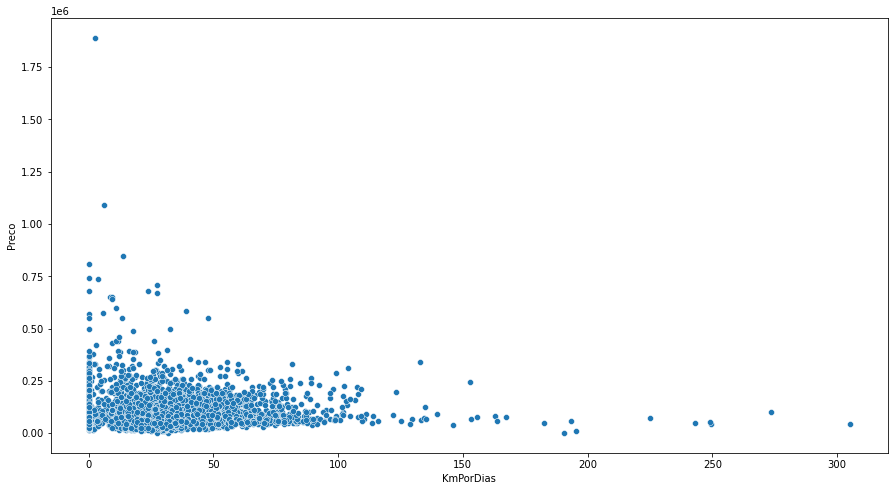

In [56]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='KmPorDias', y='Preco', data=df);

In [57]:
df[['KmPorDias', 'Preco' ]].corr()

,KmPorDias,Preco
KmPorDias,1.000000,-0.055385
Preco,-0.055385,1.000000


Não parece haver uma forte correlação linear entre a média de quilômetros por dia que o carro percorreu e seu preço. No entanto, olhando para o gráfico, é possível que exista uma relação de alguma outra ordem.

## NumOpcionais

In [58]:
var_bool = df.select_dtypes(['bool']).columns

df['NumOpcionais'] = df[var_bool].sum(axis=1)

In [59]:
df['NumOpcionais'].describe()

count    5167.000000
mean        5.170892
std         2.363588
min         0.000000
25%         4.000000
50%         6.000000
75%         7.000000
max         9.000000
Name: NumOpcionais, dtype: float64

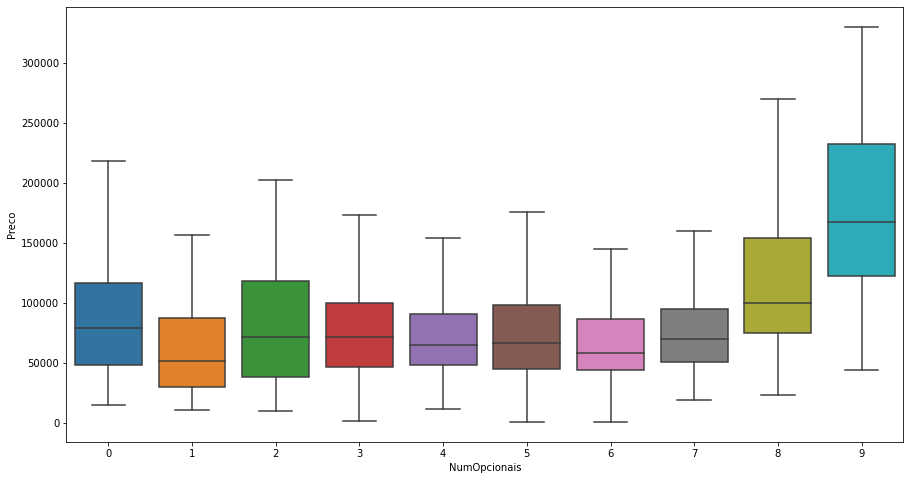

In [60]:
plt.figure(figsize=(15,8))
sns.boxplot(x='NumOpcionais', y='Preco', data=df, showfliers=False);

Como pode ser visto no gráfico acima, os veículos com 8 ou 9 itens opcionais possuem preços maiores que os demais.

## KmSqrt

In [61]:
df['KmSqrt'] = np.sqrt(df['Km'])

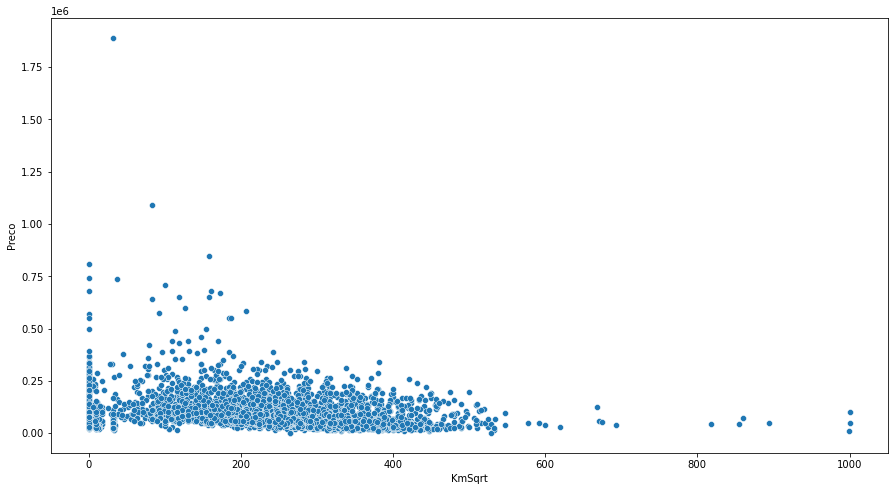

In [62]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='KmSqrt', y='Preco', data=df);

In [63]:
df[['KmSqrt', 'Km', 'Preco' ]].corr()

,KmSqrt,Km,Preco
KmSqrt,1.000000,0.906705,-0.287166
Km,0.906705,1.000000,-0.255226
Preco,-0.287166,-0.255226,1.000000


A correlação entre a raiz da quilometragem e o preço do veículo é maior que aquela observada para a quilometragem e o preço (-0.25). É interessante observar como esses relacionamentos ficaram mais fortes após a limpeza da base de dados.

## PotenciaNum

In [64]:
df['PotenciaNum'] = df['Potencia'].replace({'2.0 - 2.9':'2.5', '3.0 - 3.9': '3.5', '4.0 ou mais': '4.0'}).astype('float')

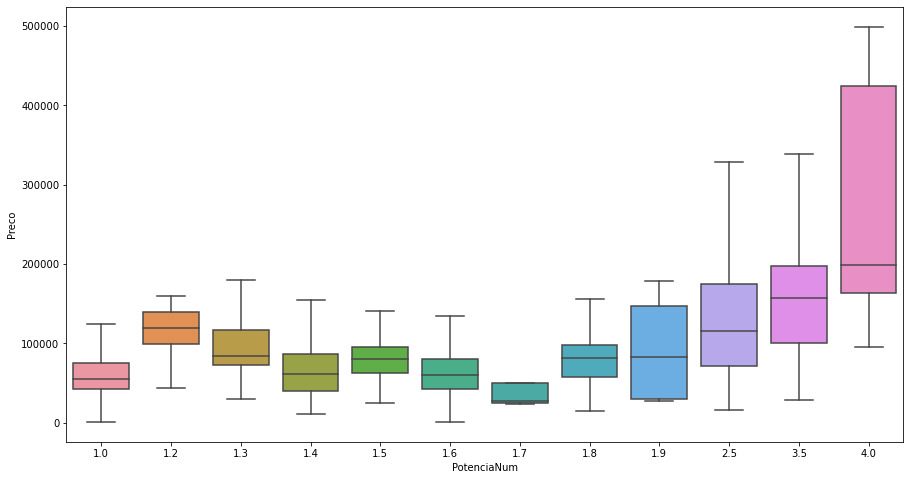

In [65]:
plt.figure(figsize=(15,8))
sns.boxplot(x='PotenciaNum', y='Preco', data=df, showfliers=False);

In [66]:
df[['PotenciaNum', 'Preco' ]].corr()

,PotenciaNum,Preco
PotenciaNum,1.000000,0.439037
Preco,0.439037,1.000000


Essa variável foi apresentada, para termos de visualização, na etapa de análise exploratória dos dados (EDA). No entanto, podemos perceber que a mesma pode ser bastante útil ao modelo devido a sua moderada correlação com a variável alvo.

O dataset final pode ser visto abaixo:

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marca           5167 non-null   object 
 1   Descricao       5167 non-null   object 
 2   Tipo            5167 non-null   object 
 3   Ano             5167 non-null   int64  
 4   UF              5167 non-null   object 
 5   Km              5167 non-null   int64  
 6   Potencia        5167 non-null   object 
 7   Combustivel     5167 non-null   object 
 8   Cambio          5167 non-null   object 
 9   Direcao         5167 non-null   object 
 10  Cor             5167 non-null   object 
 11  FinalDePlaca    5167 non-null   int64  
 12  Portas          5167 non-null   object 
 13  UnicoDono       5167 non-null   object 
 14  AceitaTrocas    5167 non-null   object 
 15  ArCondicionado  5167 non-null   bool   
 16  AirBag          5167 non-null   bool   
 17  Alarme          5167 non-null   b

In [68]:
df.to_csv('cars_data_final.csv', index=False)